<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/10.%20Week%2010/Notebook/01.DeepLearning%3AHeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
df = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')
print(df.head())
print(df.info())
print(df.describe())

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify categorical columns
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
                       'rest_ecg', 'exercise_induced_angina', 'slope',
                       'vessels_colored_by_flourosopy', 'thalassemia']

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Feature scaling for numerical columns
numerical_columns = ['age', 'resting_blood_pressure', 'cholestoral',
                     'Max_heart_rate', 'oldpeak']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 0.4957 - accuracy: 0.4999 - loss: 0.7143 - val_AUC: 0.6613 - val_accuracy: 0.6220 - val_loss: 0.6577
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6652 - accuracy: 0.6157 - loss: 0.6482 - val_AUC: 0.7861 - val_accuracy: 0.7195 - val_loss: 0.6063
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7725 - accuracy: 0.7081 - loss: 0.5934 - val_AUC: 0.8320 - val_accuracy: 0.7500 - val_loss: 0.5572
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8057 - accuracy: 0.7156 - loss: 0.5460 - val_AUC: 0.8489 - val_accuracy: 0.7561 - val_loss: 0.5138
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8406 - accuracy: 0.7640 - loss: 0.5126 - val_AUC: 0.8593 - val_accuracy: 0.7622 - val_loss: 0.4831
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8774 - accuracy: 0.7921 - loss: 0.4618 - val_AUC: 0.8654 - val_accuracy: 0.7927 - val_loss: 0.4594
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

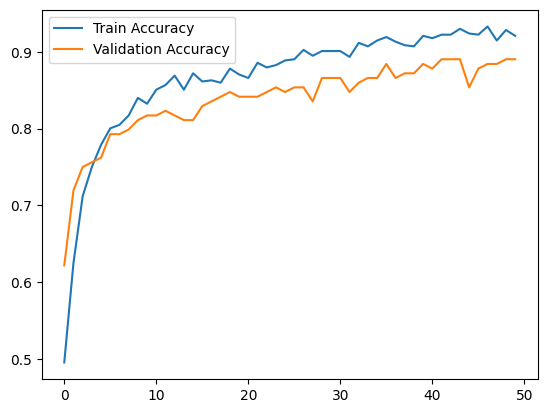

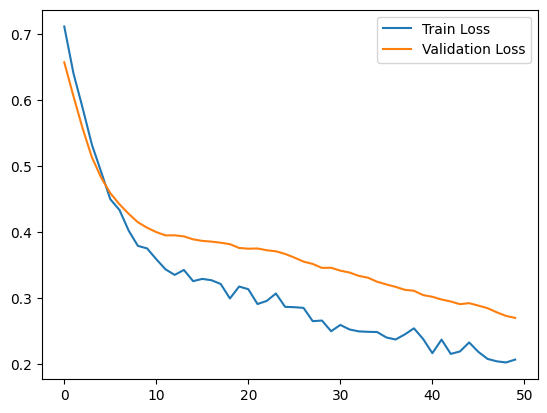

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}, AUC: {test_auc:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9735 - accuracy: 0.9315 - loss: 0.2119 
Test Accuracy: 0.93, AUC: 0.97


In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))
print("AUC:", roc_auc_score(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       100
           1       0.94      0.91      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

AUC: 0.971047619047619


In [ ]:
model.save('heart_disease_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
saved_model = load_model('heart_disease_model.h5')
